<a href="https://colab.research.google.com/github/valentinflegon/fashion_mnist/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialisation

Import

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *
from keras.losses import *
from keras.layers import Dense
from keras import Sequential


Chargement du dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0 ,  X_train_full[5000:] / 255.0
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]


Affichage du dataset

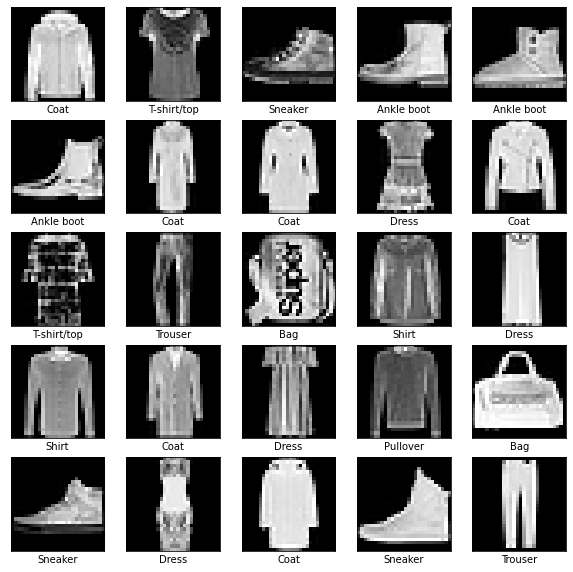

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])  
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_names[Y_train[i]])
  plt.imshow(X_train[i], cmap=plt.get_cmap("gray"))
plt.show()

#Model



Création d'un modèle avec une couche d'entrée Flatten avec 784 neurones,
une couche cachée Dense avec 128 neurones avec une fonction d'activation relu et une couche de sortie de 10 neurones (car dix classes) avec une couche d'activation softmax afin d'avoir la probabilité de chaque classe.

In [ ]:
model  = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


On compile le modèle avec une fonction de loss "SparseCategoricalCrossentropy", 
un optimiseur "adam" et une metrique "accuracy".

On fit le modèle avec notre dataset de train, 10 époques, ainsi que notre dataset de validation.

On obtien au bout de la 10eme époques une loss de 0,2501, et un accuracy de 0,9073. 
Pour la validation on obtient 0,3186 de loss et 0,8878 d'accuracy.

On peut voir un overfitting car la loss et la validation loss ont un certains écart .

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs= 10, validation_data=(X_valid, Y_valid))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 5s 3ms/step - loss: 0.5051 - accuracy: 0.8218 - val_loss: 0.4059 - val_accuracy: 0.8546
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3820 - accuracy: 0.8635 - val_loss: 0.3572 - val_accuracy: 0.8704
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3429 - accuracy: 0.8758 - val_loss: 0.3276 - val_accuracy: 0.8792
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3197 - accuracy: 0.8829 - val_loss: 0.3323 - val_accuracy: 0.8830
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2997 - accuracy: 0.8895 - val_loss: 0.3319 - val_accuracy: 0.8794
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2839 - accuracy: 0.8956 - val_loss: 0.3202 - val_accuracy: 0.8836
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2726 - accuracy: 0.8995 - val_loss: 0.3092 - val_accuracy: 0.8898
Epo

L'overfitting est vérifié par le graphique.

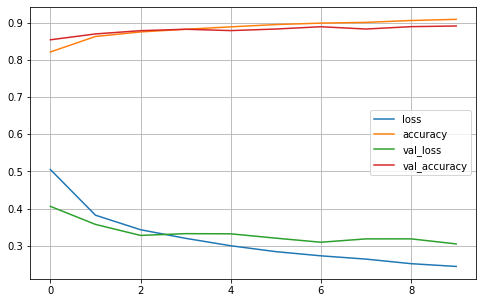

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 61.9836 - accuracy: 0.8677 - 653ms/epoch - 2ms/step
Test accuracy 0.8676999807357788


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy", test_acc)

Test accuracy ~= *0.8628000020980835*


#Amélioration du model

##Number of hidden layers

####Two hidden layers

In [ ]:
model  = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(128, activation="relu"),

  keras.layers.Dense(10, activation="softmax")
])

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn , optimizer="adam", metrics=["accuracy"])

history2 = model.fit(X_train, Y_train, epochs= 10, validation_data=(X_valid, Y_valid))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 6s 3ms/step - loss: 0.4952 - accuracy: 0.8217 - val_loss: 0.3886 - val_accuracy: 0.8596
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3701 - accuracy: 0.8645 - val_loss: 0.3446 - val_accuracy: 0.8776
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3331 - accuracy: 0.8759 - val_loss: 0.3366 - val_accuracy: 0.8806
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8847 - val_loss: 0.3396 - val_accuracy: 0.8782
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.8916 - val_loss: 0.3142 - val_accuracy: 0.8866
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2758 - accuracy: 0.8978 - val_loss: 0.3293 - val_accuracy: 0.8794
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2662 - accuracy: 0.9012 - val_loss: 0.3175 - val_accuracy: 0.8858
Epo

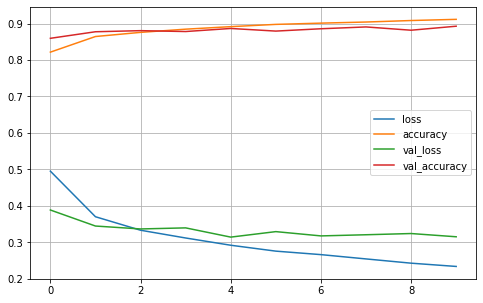

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 66.0925 - accuracy: 0.8612 - 692ms/epoch - 2ms/step
Test accuracy 0.8611999750137329


In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy", test_acc)

Test accuracy *0.8543999791145325*

Le modèle avec deux couches est similaire à celui avec q'une seule couche

###Three hidden layers

In [ ]:
model  = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(128, activation="relu"),

  keras.layers.Dense(10, activation="softmax")
])

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn , optimizer="adam", metrics=["accuracy"])

history3 = model.fit(X_train, Y_train, epochs= 10, validation_data=(X_valid, Y_valid))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 6s 3ms/step - loss: 0.4911 - accuracy: 0.8226 - val_loss: 0.3793 - val_accuracy: 0.8584
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3740 - accuracy: 0.8625 - val_loss: 0.3422 - val_accuracy: 0.8770
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3337 - accuracy: 0.8768 - val_loss: 0.3448 - val_accuracy: 0.8762
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3099 - accuracy: 0.8852 - val_loss: 0.3306 - val_accuracy: 0.8784
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2924 - accuracy: 0.8896 - val_loss: 0.3112 - val_accuracy: 0.8820
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2757 - accuracy: 0.8961 - val_loss: 0.3066 - val_accuracy: 0.8902
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2634 - accuracy: 0.9001 - val_loss: 0.3074 - val_accuracy: 0.8904
Epo

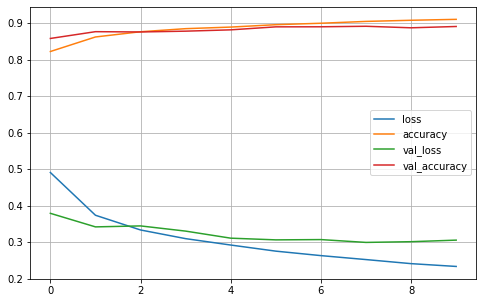

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 62.2805 - accuracy: 0.8516 - 666ms/epoch - 2ms/step
Test accuracy 0.8515999913215637


In [ ]:
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy", test_acc)

Test accuracy  ~= *0.8424999713897705*


###Four hidder layers


In [ ]:
model  = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(128, activation="relu"),

  keras.layers.Dense(10, activation="softmax")
])

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn , optimizer="adam", metrics=["accuracy"])

history4 = model.fit(X_train, Y_train, epochs= 10, validation_data=(X_valid, Y_valid))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 6s 3ms/step - loss: 0.4945 - accuracy: 0.8220 - val_loss: 0.3672 - val_accuracy: 0.8680
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3698 - accuracy: 0.8633 - val_loss: 0.3944 - val_accuracy: 0.8570
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3303 - accuracy: 0.8775 - val_loss: 0.3333 - val_accuracy: 0.8790
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3082 - accuracy: 0.8864 - val_loss: 0.3209 - val_accuracy: 0.8858
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2913 - accuracy: 0.8909 - val_loss: 0.3162 - val_accuracy: 0.8884
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2760 - accuracy: 0.8958 - val_loss: 0.3130 - val_accuracy: 0.8918
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2639 - accuracy: 0.9012 - val_loss: 0.3297 - val_accuracy: 0.8820
Epo

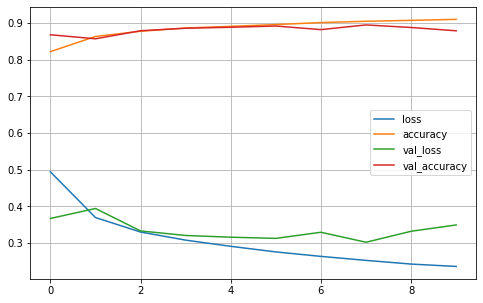

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 63.3037 - accuracy: 0.8550 - 683ms/epoch - 2ms/step
Test accuracy 0.8550000190734863


In [ ]:
pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy", test_acc)

Test accuracy ~= *0.8501999974250793*

Changer le nombre de couche (sans changer le nombre de neurone sur les couches) n'a pas apporté de grosses améliorations

##Number of neurons

###300 neurons

In [ ]:
model  = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn , optimizer="adam", metrics=["accuracy"])

history5 = model.fit(X_train, Y_train, epochs= 10, validation_data=(X_valid, Y_valid))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 7s 4ms/step - loss: 0.4912 - accuracy: 0.8249 - val_loss: 0.3847 - val_accuracy: 0.8634
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3684 - accuracy: 0.8681 - val_loss: 0.3458 - val_accuracy: 0.8782
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3338 - accuracy: 0.8770 - val_loss: 0.3267 - val_accuracy: 0.8848
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3070 - accuracy: 0.8864 - val_loss: 0.3142 - val_accuracy: 0.8870
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2888 - accuracy: 0.8929 - val_loss: 0.2991 - val_accuracy: 0.8900
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2731 - accuracy: 0.8990 - val_loss: 0.2972 - val_accuracy: 0.8918
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2613 - accuracy: 0.9025 - val_loss: 0.3213 - val_accuracy: 0.8852
Epo

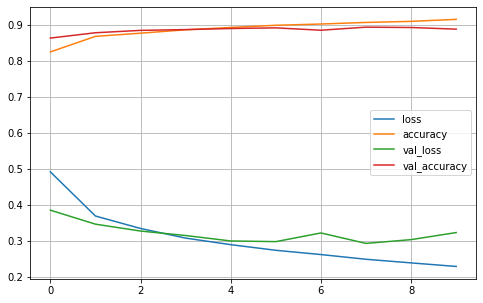

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 60.7956 - accuracy: 0.8661 - 827ms/epoch - 3ms/step
Test accuracy 0.866100013256073


In [ ]:
pd.DataFrame(history5.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy", test_acc)



Test accuracy ~= *0.8571000099182129*

###150

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 6s 3ms/step - loss: 0.5011 - accuracy: 0.8224 - val_loss: 0.3819 - val_accuracy: 0.8674
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3780 - accuracy: 0.8630 - val_loss: 0.3937 - val_accuracy: 0.8628
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3394 - accuracy: 0.8757 - val_loss: 0.3278 - val_accuracy: 0.8834
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3138 - accuracy: 0.8841 - val_loss: 0.3315 - val_accuracy: 0.8790
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2973 - accuracy: 0.8901 - val_loss: 0.3227 - val_accuracy: 0.8852
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2816 - accuracy: 0.8955 - val_loss: 0.3083 - val_accuracy: 0.8896
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9006 - val_loss: 0.3238 - val_accuracy: 0.8838
Epo

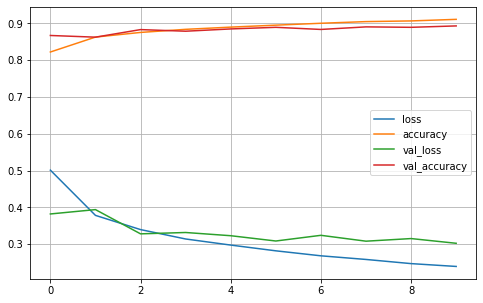

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 59.6402 - accuracy: 0.8674 - 692ms/epoch - 2ms/step
Test accuracy 0.8673999905586243


In [ ]:
model  = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(150, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn , optimizer="adam", metrics=["accuracy"])

history7 = model.fit(X_train, Y_train, epochs= 10, validation_data=(X_valid, Y_valid))

pd.DataFrame(history7.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy", test_acc)

Test accuracy ~= *0.8738999962806702*
 similaire au premier model et prediction similaire également



###20

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 4s 2ms/step - loss: 0.5834 - accuracy: 0.8000 - val_loss: 0.4438 - val_accuracy: 0.8450
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4443 - accuracy: 0.8449 - val_loss: 0.4650 - val_accuracy: 0.8330
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4144 - accuracy: 0.8546 - val_loss: 0.4115 - val_accuracy: 0.8570
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3927 - accuracy: 0.8614 - val_loss: 0.4081 - val_accuracy: 0.8574
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8663 - val_loss: 0.3994 - val_accuracy: 0.8634
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3675 - accuracy: 0.8699 - val_loss: 0.4085 - val_accuracy: 0.8538
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3553 - accuracy: 0.8737 - val_loss: 0.4048 - val_accuracy: 0.8588
Epo

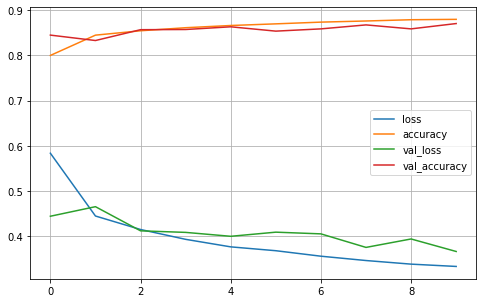

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 75.8947 - accuracy: 0.8257 - 603ms/epoch - 2ms/step
Test accuracy 0.8256999850273132


In [ ]:
model  = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(20, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn , optimizer="adam", metrics=["accuracy"])

history6 = model.fit(X_train, Y_train, epochs= 10, validation_data=(X_valid, Y_valid))

pd.DataFrame(history6.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy", test_acc)

Test accuracy ~= *0.8289999961853027*
moins bien 



##Activation Functions


### Sigmoid


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 5s 3ms/step - loss: 0.5585 - accuracy: 0.8107 - val_loss: 0.4090 - val_accuracy: 0.8572
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4018 - accuracy: 0.8558 - val_loss: 0.3736 - val_accuracy: 0.8652
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3627 - accuracy: 0.8694 - val_loss: 0.3471 - val_accuracy: 0.8740
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3371 - accuracy: 0.8779 - val_loss: 0.3317 - val_accuracy: 0.8798
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3184 - accuracy: 0.8840 - val_loss: 0.3240 - val_accuracy: 0.8822
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3032 - accuracy: 0.8894 - val_loss: 0.3383 - val_accuracy: 0.8784
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2890 - accuracy: 0.8949 - val_loss: 0.3173 - val_accuracy: 0.8786
Epo

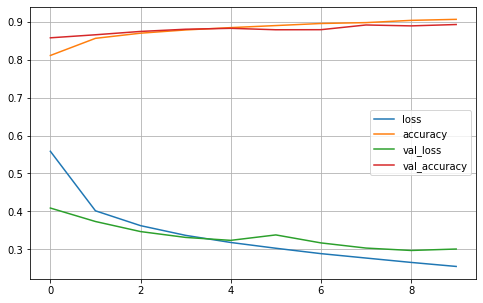

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 0.4087 - accuracy: 0.8584 - 641ms/epoch - 2ms/step
Test accuracy 0.8583999872207642


In [ ]:
model  = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(128, activation="sigmoid"),
  keras.layers.Dense(10, activation="softmax")
])

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn , optimizer="adam", metrics=["accuracy"])

history8 = model.fit(X_train, Y_train, epochs= 10, validation_data=(X_valid, Y_valid))

pd.DataFrame(history8.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy", test_acc)

Test accuracy ~= *0.8535000085830688*

###tanh

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 5s 3ms/step - loss: 0.4862 - accuracy: 0.8250 - val_loss: 0.3891 - val_accuracy: 0.8606
Epoch 2/6
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3741 - accuracy: 0.8643 - val_loss: 0.3670 - val_accuracy: 0.8656
Epoch 3/6
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3387 - accuracy: 0.8771 - val_loss: 0.3309 - val_accuracy: 0.8808
Epoch 4/6
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3137 - accuracy: 0.8854 - val_loss: 0.3280 - val_accuracy: 0.8824
Epoch 5/6
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2989 - accuracy: 0.8897 - val_loss: 0.3210 - val_accuracy: 0.8824
Epoch 6/6
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2816 - accuracy: 0.8961 - val_loss: 0.2969 - val_accuracy: 0.8928


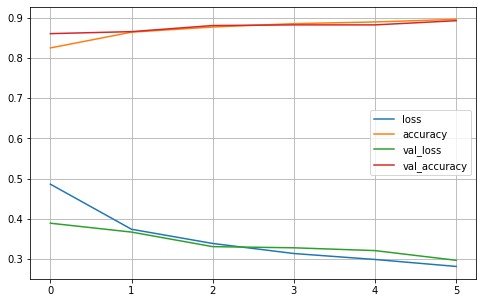

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 1s - loss: 0.4167 - accuracy: 0.8551 - 625ms/epoch - 2ms/step
Test accuracy 0.8550999760627747


In [ ]:
model  = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(128, activation="tanh"),
  keras.layers.Dense(10, activation="softmax")
])

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn , optimizer="adam", metrics=["accuracy"])

history8 = model.fit(X_train, Y_train, epochs= 6, validation_data=(X_valid, Y_valid))

pd.DataFrame(history8.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test accuracy", test_acc)

Test accuracy ~=*0.8438000082969666*

##Network architecture


In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten

X_valid, X_train = X_train_full[:5000] / 255.0 ,  X_train_full[5000:] / 255.0
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]

model = keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
	
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn , optimizer="adam", metrics=["accuracy"])

history7 = model.fit(X_train, Y_train, epochs= 4, validation_data=(X_valid, Y_valid))


Epoch 1/4


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 28s 16ms/step - loss: 0.4063 - accuracy: 0.8568 - val_loss: 0.3191 - val_accuracy: 0.8902
Epoch 2/4
1719/1719 [==============================] - 27s 16ms/step - loss: 0.2880 - accuracy: 0.8975 - val_loss: 0.2953 - val_accuracy: 0.9020
Epoch 3/4
1719/1719 [==============================] - 27s 16ms/step - loss: 0.2554 - accuracy: 0.9090 - val_loss: 0.2833 - val_accuracy: 0.8980
Epoch 4/4
1719/1719 [==============================] - 27s 16ms/step - loss: 0.2325 - accuracy: 0.9167 - val_loss: 0.2819 - val_accuracy: 0.9020


Le modèle (qui vient de https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/) fonctionne bien mais il overffit très rapidement.

##Prédictions

[0.08533674 0.08533674 0.23196931 0.08533674 0.08533674 0.08533674
 0.08533674 0.08533674 0.08533674 0.08533674]
2  =>  Pullover


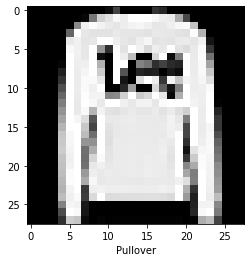

In [ ]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])
pred = probability_model.predict(X_test)
plt.imshow(X_test[1], cmap=plt.get_cmap("gray"))
plt.xlabel(class_names[Y_test[1]])

print(pred[1])
print(  np.argmax(pred[1])," => ", class_names[np.argmax(pred[1])])


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

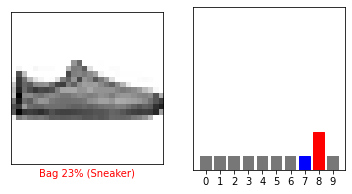

In [ ]:
i = 12

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  Y_test)
plt.show()